In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

In [7]:
if (!require("readr", quietly = TRUE)) {
  install.packages("readr")}

if (!require("ggplot2", quietly = TRUE))
  BiocManager::install("ggplot2")

if (!require("DESeq2", quietly = TRUE))
  BiocManager::install("DESeq2")

if (!require("ggrepel", quietly = TRUE))
  BiocManager::install("ggrepel")

In [147]:
library("readr")
library("ggplot2")
library("DESeq2")
library("ggrepel")

In [86]:
library("tidyr")
library("dplyr")
library("tibble")

In [37]:
#Load counts data
countsdata<- read.csv("/projects/robson-lab/users/wangxy/GCM1_KO/fastq/processed/salmon_quant2/gene_counts_with_symbol.tsv", header = TRUE, sep = "\t", check.names = FALSE)

In [38]:
head(countsdata)

,gene_id,symbol,gene,GCM1_KO_C1,GCM1_KO_E4,GCM1_KO_G4,GCM1_WT_1,GCM1_WT_2,GCM1_WT_3
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000210196,MT-TP,ENSG00000210196 0 0 0 0 0 0,NA,NA,NA,NA,NA,NA
2,ENSG00000210194,MT-TE,ENSG00000210194,2.00,2.0,7.00,2.00,4.00,6.00
3,ENSG00000198695,MT-ND6,ENSG00000198695,5468.59,3557.1,2901.93,2645.82,4051.09,4977.49
4,ENSG00000198786,MT-ND5,ENSG00000198786,82904.00,95104.5,54796.50,64680.40,54350.10,84416.20
5,ENSG00000210184,MT-TS2,ENSG00000210184,0.00,0.0,0.00,0.00,0.00,0.00
6,ENSG00000198886,MT-ND4,ENSG00000198886,150128.00,155666.0,125430.00,165922.00,132538.00,182367.00


In [39]:
countsdata$gene<- NULL

In [40]:
head(countsdata)

,gene_id,symbol,GCM1_KO_C1,GCM1_KO_E4,GCM1_KO_G4,GCM1_WT_1,GCM1_WT_2,GCM1_WT_3
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000210196,MT-TP,NA,NA,NA,NA,NA,NA
2,ENSG00000210194,MT-TE,2.00,2.0,7.00,2.00,4.00,6.00
3,ENSG00000198695,MT-ND6,5468.59,3557.1,2901.93,2645.82,4051.09,4977.49
4,ENSG00000198786,MT-ND5,82904.00,95104.5,54796.50,64680.40,54350.10,84416.20
5,ENSG00000210184,MT-TS2,0.00,0.0,0.00,0.00,0.00,0.00
6,ENSG00000198886,MT-ND4,150128.00,155666.0,125430.00,165922.00,132538.00,182367.00


In [41]:
countsdata<- countsdata%>% 
    mutate_if(is.numeric, ~replace_na(., 0))

In [42]:
head(countsdata)

,gene_id,symbol,GCM1_KO_C1,GCM1_KO_E4,GCM1_KO_G4,GCM1_WT_1,GCM1_WT_2,GCM1_WT_3
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000210196,MT-TP,0.00,0.0,0.00,0.00,0.00,0.00
2,ENSG00000210194,MT-TE,2.00,2.0,7.00,2.00,4.00,6.00
3,ENSG00000198695,MT-ND6,5468.59,3557.1,2901.93,2645.82,4051.09,4977.49
4,ENSG00000198786,MT-ND5,82904.00,95104.5,54796.50,64680.40,54350.10,84416.20
5,ENSG00000210184,MT-TS2,0.00,0.0,0.00,0.00,0.00,0.00
6,ENSG00000198886,MT-ND4,150128.00,155666.0,125430.00,165922.00,132538.00,182367.00


In [84]:
#countsdata <- countsdata[!duplicated(countsdata$gene_id), ]
#rownames(countsdata) <- countsdata$gene_id

In [46]:
metadata<- read.csv("/projects/robson-lab/users/wangxy/GCM1_KO/fastq/processed/salmon_quant2/metadata.tsv", header = TRUE, sep = "\t", row.names= 1)

In [47]:
metadata

,condition,replicate,path
,<chr>,<chr>,<chr>
GCM1_KO_C1,KO,C1,GCM1_KO_C1_GT23-11436_TCCAACGC-AAGTCCAA_S58_L002
GCM1_KO_E4,KO,E4,GCM1_KO_E4_GT23-11437_CCGTGAAG-ATCCACTG_S56_L002
GCM1_KO_G4,KO,G4,GCM1_KO_G4_GT23-11438_TTACAGGA-GCTTGTCA_S53_L002
GCM1_WT_1,WT,1,GCM1_WT_1_GT23-11433_ACTAAGAT-CCGCGGTT_S57_L002
GCM1_WT_2,WT,2,GCM1_WT_2_GT23-11434_GTCGGAGC-TTATAACC_S46_L002
GCM1_WT_3,WT,3,GCM1_WT_3_GT23-11435_CTTGGTAT-GGACTTGG_S41_L002


In [45]:
nrow(countsdata)

[1] 62266

In [49]:
#Remove low counts gene
countsdata <- countsdata %>%
  filter( rowSums( across(where(is.numeric)), na.rm = TRUE ) > 50 )

In [50]:
nrow(countsdata)

[1] 9305

In [55]:
#Keep counts data only
cts<- as.matrix(countsdata[,3:8])

In [56]:
head(cts)

,GCM1_KO_C1,GCM1_KO_E4,GCM1_KO_G4,GCM1_WT_1,GCM1_WT_2,GCM1_WT_3
ENSG00000198695,5468.59,3557.10,2901.93,2645.82,4051.09,4977.49
ENSG00000198786,82904.00,95104.50,54796.50,64680.40,54350.10,84416.20
ENSG00000198886,150128.00,155666.00,125430.00,165922.00,132538.00,182367.00
ENSG00000212907,9158.19,9098.66,7615.02,10439.40,9326.62,12268.60
ENSG00000198840,13011.00,11853.40,9043.58,11112.90,9316.98,14429.70
ENSG00000228253,21156.70,20048.70,16129.60,18783.50,18763.50,23420.40


In [58]:
#Rount counts to integer
cts <- round(cts)
mode(cts) <- "integer"  

In [59]:
head(cts)

,GCM1_KO_C1,GCM1_KO_E4,GCM1_KO_G4,GCM1_WT_1,GCM1_WT_2,GCM1_WT_3
ENSG00000198695,5469,3557,2902,2646,4051,4977
ENSG00000198786,82904,95104,54796,64680,54350,84416
ENSG00000198886,150128,155666,125430,165922,132538,182367
ENSG00000212907,9158,9099,7615,10439,9327,12269
ENSG00000198840,13011,11853,9044,11113,9317,14430
ENSG00000228253,21157,20049,16130,18784,18764,23420


In [51]:
metadata[,c("condition","replicate")]<- lapply(metadata[,c("condition","replicate")], factor)

In [61]:
dds <- DESeqDataSetFromMatrix(countData=cts, colData=metadata, design=~condition)

In [62]:
dds

class: DESeqDataSet 
dim: 9305 6 
metadata(1): version
assays(1): counts
rownames(9305): ENSG00000198695 ENSG00000198786 ... ENSG00000225173
  ENSG00000166189
rowData names(0):
colnames(6): GCM1_KO_C1 GCM1_KO_E4 ... GCM1_WT_2 GCM1_WT_3
colData names(3): condition replicate path

In [63]:
dds<- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [67]:
result<- results(dds, contrast = c("condition", "WT", "KO"))

In [68]:
head(result)

log2 fold change (MLE): condition WT vs KO 
Wald test p-value: condition WT vs KO 
DataFrame with 6 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000198695   3839.59      0.1235376 0.2758173  0.447897 6.54228e-01
ENSG00000198786  70408.16     -0.0566822 0.1705981 -0.332256 7.39696e-01
ENSG00000198886 149136.55      0.2918890 0.0700475  4.167015 3.08614e-05
ENSG00000212907   9503.75      0.4450886 0.0530635  8.387849 4.95117e-17
ENSG00000198840  11164.37      0.1720381 0.1169450  1.471102 1.41264e-01
ENSG00000228253  19352.26      0.2322017 0.0930474  2.495519 1.25773e-02
                       padj
                  <numeric>
ENSG00000198695 8.22542e-01
ENSG00000198786 8.73268e-01
ENSG00000198886 3.46102e-04
ENSG00000212907 3.94856e-15
ENSG00000198840 3.36205e-01
ENSG00000228253 5.65917e-02

In [89]:
#Add gene name to result table
res <- result %>%
  as.data.frame() %>%
  rownames_to_column("gene_id")

symbol<- countsdata$symbol[ match(res$gene_id, countsdata$gene_id) ]

res$symbol <- symbol

In [90]:
head(res)

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000198695,3839.590,0.12353762,0.27581728,0.4478966,6.542278e-01,8.225417e-01,MT-ND6
2,ENSG00000198786,70408.161,-0.05668218,0.17059806,-0.3322557,7.396962e-01,8.732682e-01,MT-ND5
3,ENSG00000198886,149136.554,0.29188898,0.07004750,4.1670149,3.086143e-05,3.461020e-04,MT-ND4
4,ENSG00000212907,9503.751,0.44508865,0.05306350,8.3878491,4.951173e-17,3.948561e-15,MT-ND4L
5,ENSG00000198840,11164.371,0.17203809,0.11694504,1.4711020,1.412635e-01,3.362050e-01,MT-ND3
6,ENSG00000228253,19352.258,0.23220169,0.09304745,2.4955191,1.257730e-02,5.659172e-02,MT-ATP8


In [91]:
write.csv(as.data.frame(res), file = "/projects/robson-lab/users/wangxy/GCM1_KO/result/GCM1_WT_KO.csv")

In [76]:
#Add annotation to result table to color the volcano plot
volc <- result %>%                                  
  as.data.frame() %>%          
  mutate(
    log10padj = -log10(padj),
    status = case_when(
      padj < 0.05 & log2FoldChange >  1  ~ "Up",
      padj < 0.05 & log2FoldChange < -1 ~ "Down",
      TRUE                               ~ "NS"
    )
  )

Warning message:
“Removed 54 rows containing missing values or values outside the scale range
(`geom_point()`).”


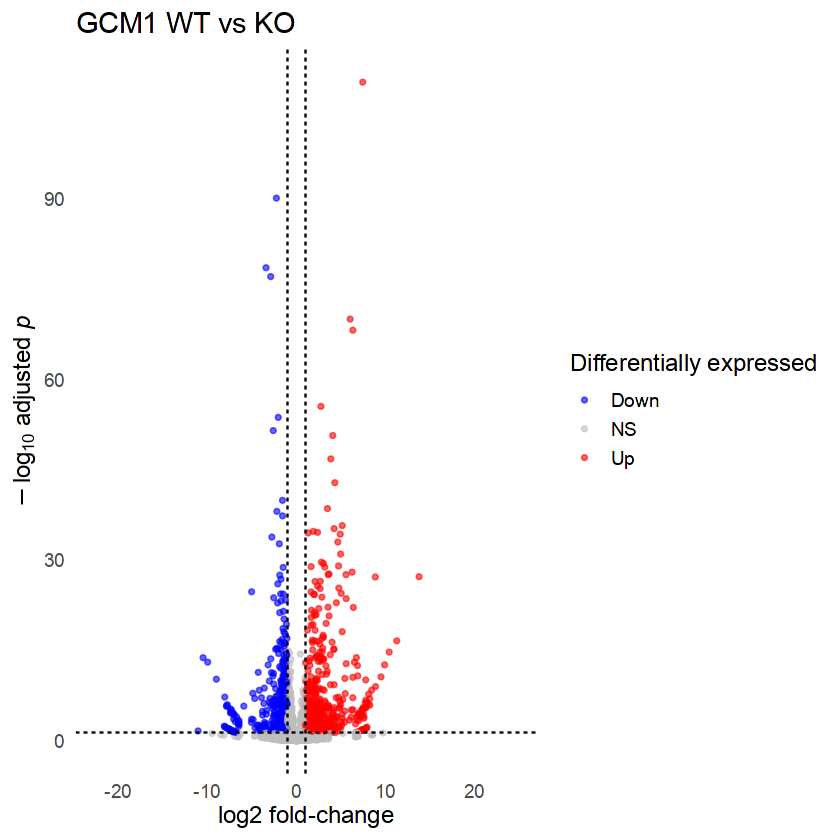

In [92]:
ggplot(volc, aes(log2FoldChange, log10padj, colour = status)) +
  geom_point(alpha = 0.6, size = 1) +
  geom_vline(xintercept = c(-1, 1),  linetype = "dashed") +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed") +
  scale_colour_manual(
    values = c(Up = "red", Down = "blue", NS = "grey"),
    name   = "Differentially expressed"
  ) +
  labs(
    x = "log2 fold-change",
    y = expression(-log[10]~adjusted~italic(p)),
    title = "GCM1 WT vs KO"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    legend.position = "right",
    panel.grid = element_blank()
  )

In [93]:
library(pheatmap)

In [94]:
#Top up/down regulated gene that I selected to plot heatmap
geneset<- c("ENSG00000148400","ENSG00000115884","ENSG00000112195","ENSG00000203783","ENSG00000179776","ENSG00000173559","ENSG00000139618","ENSG00000132517","ENSG00000064651","ENSG00000043591","ENSG00000187123")

In [95]:
vsd<- vst(dds, blind = TRUE)

In [96]:
mat<- assay (vsd)[geneset, ]

In [120]:
mat_z <- t(scale(t(mat)))

In [121]:
#Add gene name to the map
sym <- countsdata$symbol[ match(rownames(dds), countsdata$gene_id) ]
rowData(dds)$symbol <- sym
rownames(mat_z) <- rowData(dds)$symbol[ match(rownames(mat_z), rownames(dds)) ]

In [128]:
sample_anno <- as.data.frame(colData(dds)[ , c("condition", "replicate") ])

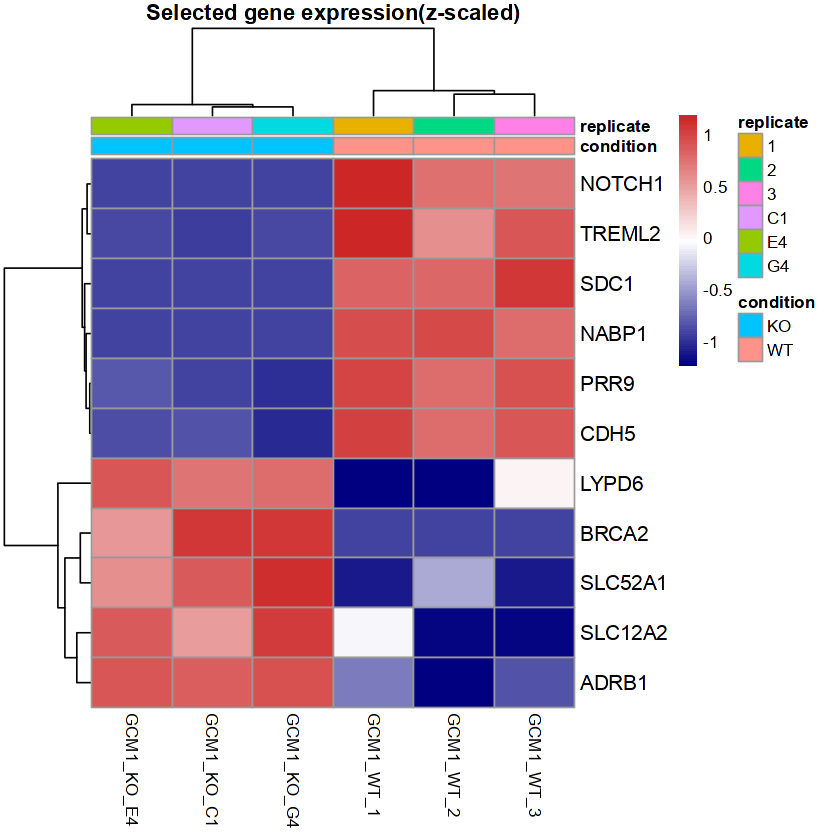

In [149]:
pheatmap(
  mat_z,
  color            = colorRampPalette(c("navy", "white", "firebrick3"))(100),
  annotation_col   = sample_anno,      
  show_rownames    = TRUE,
  fontsize_row     = 12,
  main             = "Selected gene expression(z-scaled)"
)

In [137]:
#GO analysis
library(clusterProfiler)

In [150]:
#Select upregulated gene to do the GO analysis
sig <- rownames(result)[ result$padj < 0.05 & result$log2FoldChange > 1 ]

In [151]:
ego <- enrichGO(gene         = sig,
                OrgDb        = "org.Hs.eg.db",
                keyType      = "ENSEMBL", 
                ont          = "BP",
                pAdjustMethod= "BH",
                qvalueCutoff = 0.05)

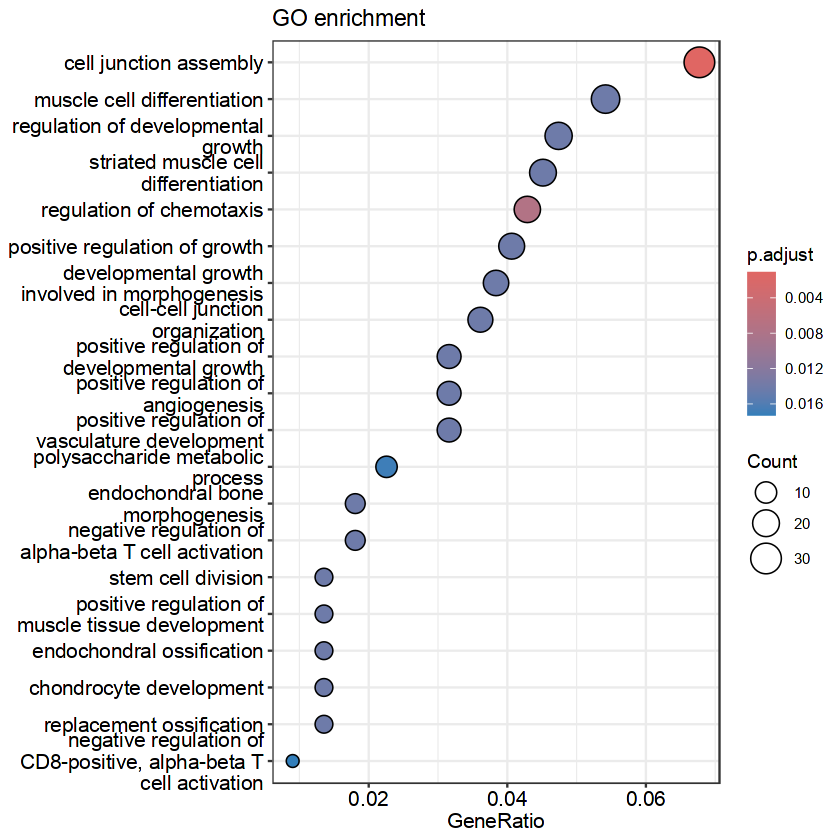

In [152]:
dotplot(ego, showCategory = 20) + ggtitle("GO enrichment")